In [1]:
import pandas as pd

In [2]:
#file_blat_cre = '/data2/k821209/C.re/sra/PRJNA291337/SRR2132438/trinity_out_dir/blat/out_noheder.psl'
file_blat_cre_cds = '/data2/k821209/C.re/sra/PRJNA291337/SRR2132438_assembled/trinity_out_dir/blat/out.cds.noheader.psl'
#file_blat_ath = '/data2/k821209/C.re/sra/ERR754066/trinity_out_dir/blat/out.noheader.psl'

In [3]:
#df_cre = pd.read_csv(file_blat_cre,sep='\t',header=None)
#df_ath = pd.read_csv(file_blat_ath,sep='\t',header=None)
df_cre_cds = pd.read_csv(file_blat_cre_cds,sep='\t',header=None)

In [ ]:
df = df_ath
mask = (df[1] <= 2) # mismatch 2개 이하
df_ath_mask = df[mask]

df = df_cre
mask = (df[1] <= 2) # mismatch 2개 이하
df_cre_mask = df[mask]

In [4]:
df = df_cre_cds
mask = (df[1] <= 2) # mismatch 2개 이하
df_cre_cds_mask = df[mask]

In [ ]:
dicGN2pos = {}
df_mask = df_ath_mask
for i in df_mask.index:
    gn = df_mask.loc[i][13]
    m_left = int(df_mask.loc[i][15])
    m_right = int(df_mask.loc[i][16])
    try:
        dicGN2pos[gn] += range(m_left,m_right)
    except KeyError:
        dicGN2pos[gn] = [df_mask.loc[i][14]]
        dicGN2pos[gn] += range(m_left,m_right)
dicGN2pos_ath = dicGN2pos

        
dicGN2pos = {}
df_mask = df_cre_mask
for i in df_mask.index:
    gn = df_mask.loc[i][13]
    m_left = int(df_mask.loc[i][15])
    m_right = int(df_mask.loc[i][16])
    try:
        dicGN2pos[gn] += range(m_left,m_right)
    except KeyError:
        dicGN2pos[gn] = [df_mask.loc[i][14]]
        dicGN2pos[gn] += range(m_left,m_right)
dicGN2pos_cre = dicGN2pos

In [5]:
dicGN2pos = {}
df_mask = df_cre_cds_mask
for i in df_mask.index:
    gn = df_mask.loc[i][13]
    m_left = int(df_mask.loc[i][15])
    m_right = int(df_mask.loc[i][16])
    try:
        dicGN2pos[gn] += range(m_left,m_right)
    except KeyError:
        dicGN2pos[gn] = [df_mask.loc[i][14]]
        dicGN2pos[gn] += range(m_left,m_right)
dicGN2pos_cre_cds = dicGN2pos

In [ ]:
print(len(dicGN2pos_ath.keys()), len(dicGN2pos_cre.keys()), len(dicGN2pos_cre_cds.keys()))

In [6]:
len(dicGN2pos_cre_cds.keys())

14031

In [8]:
cf_0_25 = []
cf_25_50 = []
cf_50_75 = []
cf_75_100 = []

a_cf_0_25 = [] # 0 ~ 2000
a_cf_25_50 = []
a_cf_50_75 = []
a_cf_75_100 = []

b_cf_0_25 = [] # 2000 ~ 4000
b_cf_25_50 = []
b_cf_50_75 = []
b_cf_75_100 = []

c_cf_0_25 = [] # 4000 ~ 6000
c_cf_25_50 = []
c_cf_50_75 = []
c_cf_75_100 = []

d_cf_0_25 = [] # 6000 ~ 
d_cf_25_50 = []
d_cf_50_75 = []
d_cf_75_100 = []

cover_fraction = []
cover_fraction_2000 = []
cover_fraction_2000_4000 = []
cover_fraction_4000_6000 = []
cover_fraction_6000 = []
dicGN2pos = dicGN2pos_cre_cds

#def add

for gn in dicGN2pos.keys():
    mapped_pos = float(len(set(dicGN2pos[gn][1:])))
    gene_length = float(dicGN2pos[gn][0])
    cov = mapped_pos/gene_length
    cover_fraction.append(cov)
    if 0 <= cov < 0.25:
        cf_0_25.append(cov)
    elif 0.25 <= cov < 0.50:
        cf_25_50.append(cov)
    elif 0.50 <= cov < 0.75:
        cf_50_75.append(cov)
    elif 0.75 <= cov <= 1:
        cf_75_100.append(cov)
    else:
        print(mapped_pos, gene_length)
    if gene_length < 2000:
        cover_fraction_2000.append(cov)
        if 0 <= cov < 0.25:
            a_cf_0_25.append(cov)
        elif 0.25 <= cov < 0.50:
            a_cf_25_50.append(cov)
        elif 0.50 <= cov < 0.75:
            a_cf_50_75.append(cov)
        elif 0.75 <= cov <= 1:
            a_cf_75_100.append(cov)
    elif 2000 <= gene_length < 4000:
        cover_fraction_2000_4000.append(cov)
        if 0 <= cov < 0.25:
            b_cf_0_25.append(cov)
        elif 0.25 <= cov < 0.50:
            b_cf_25_50.append(cov)
        elif 0.50 <= cov < 0.75:
            b_cf_50_75.append(cov)
        elif 0.75 <= cov <= 1:
            b_cf_75_100.append(cov)
    elif 4000 <= gene_length < 6000:
        cover_fraction_4000_6000.append(cov)
        if 0 <= cov < 0.25:
            c_cf_0_25.append(cov)
        elif 0.25 <= cov < 0.50:
            c_cf_25_50.append(cov)
        elif 0.50 <= cov < 0.75:
            c_cf_50_75.append(cov)
        elif 0.75 <= cov <= 1:
            c_cf_75_100.append(cov)
    elif 6000 <= gene_length:
        cover_fraction_6000.append(cov)
        if 0 <= cov < 0.25:
            d_cf_0_25.append(cov)
        elif 0.25 <= cov < 0.50:
            d_cf_25_50.append(cov)
        elif 0.50 <= cov < 0.75:
            d_cf_50_75.append(cov)
        elif 0.75 <= cov <= 1:
            d_cf_75_100.append(cov)



In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette("deep", 20)
#colors = sns.choose_colorbrewer_palette('qualitative') #{‘sequential’, ‘diverging’, ‘qualitative’}
sns.set(context="poster")
sns.set_style("dark")

In [11]:
print(len(a_cf_0_25) + len(a_cf_25_50) + len(a_cf_50_75) + len(a_cf_75_100))
print(len(b_cf_0_25) + len(b_cf_25_50) + len(b_cf_50_75) + len(b_cf_75_100))
print(len(c_cf_0_25) + len(c_cf_25_50) + len(c_cf_50_75) + len(c_cf_75_100))
print(len(d_cf_0_25) + len(d_cf_25_50) + len(d_cf_50_75) + len(d_cf_75_100))
# print(4792+6443+2206+1805)
print(8193+3548+1260+1030)
print(len(cover_fraction_2000))
print(len(cover_fraction_2000_4000))
print(len(cover_fraction_4000_6000))
print(len(cover_fraction_6000))

8193
3548
1260
1030
14031
8193
3548
1260
1030


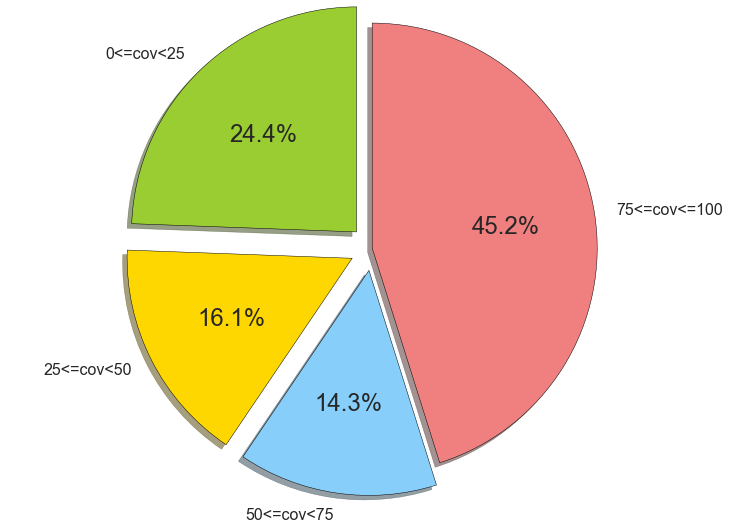

In [12]:
# The slices will be ordered and plotted counter-clockwise.
plt.rcParams['font.size'] = 24
labels = '0<=cov<25', '25<=cov<50', '50<=cov<75', '75<=cov<=100'
sizes = [len(cf_0_25), len(cf_25_50), len(cf_50_75), len(cf_75_100)]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0.1, 0.1, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()

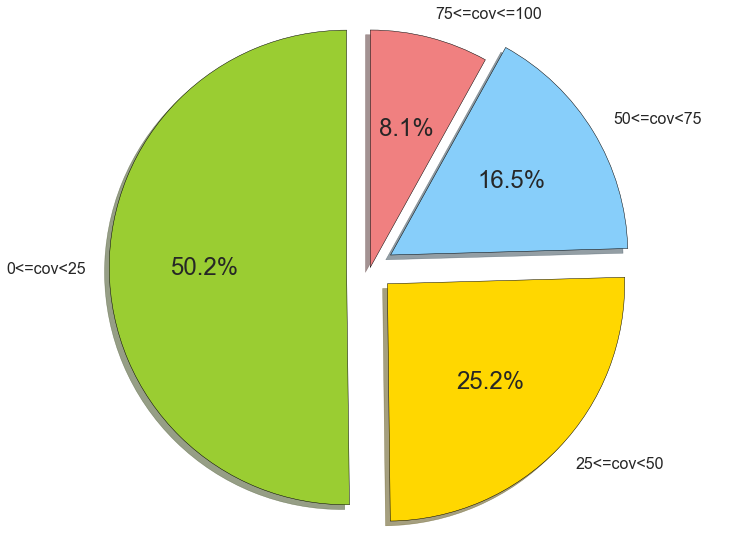

In [21]:
# The slices will be ordered and plotted counter-clockwise.
plt.rcParams['font.size'] = 24
labels = '0<=cov<25', '25<=cov<50', '50<=cov<75', '75<=cov<=100'
sizes = [len(d_cf_0_25), len(d_cf_25_50), len(d_cf_50_75), len(d_cf_75_100)]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0.1, 0.1, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()

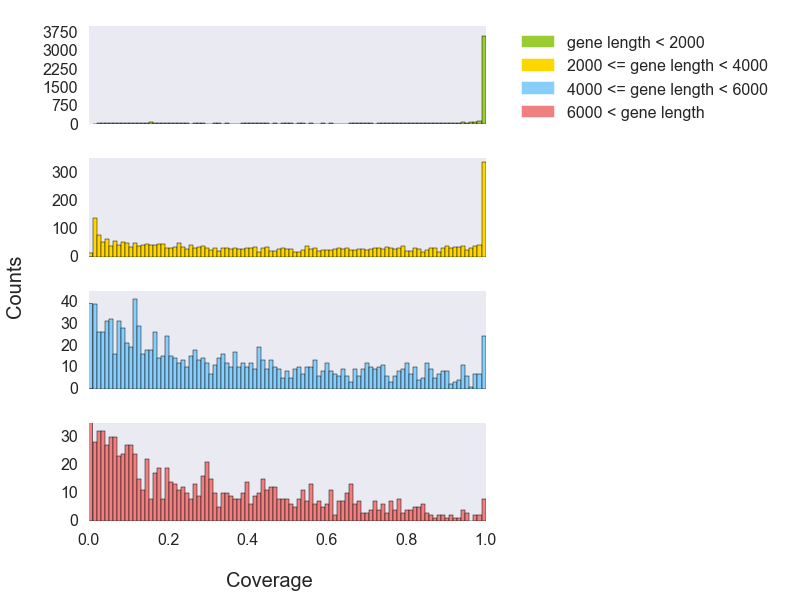

In [17]:
import matplotlib.patches as mpatches
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,sharex=True,figsize=(7,8))
ax1.hist(cover_fraction_2000,color=colors[0],bins=np.linspace(0,1,100),label='gene length < 2000')
ax2.hist(cover_fraction_2000_4000,color=colors[1],bins=np.linspace(0,1,100),label='2000 <= gene length < 4000')
ax3.hist(cover_fraction_4000_6000,color=colors[2],bins=np.linspace(0,1,100),label='4000 <= gene length < 6000')
ax4.hist(cover_fraction_6000,color=colors[3],bins=np.linspace(0,1,100), label='6000 < gene length')

start, end = ax1.get_ylim()
ax1.yaxis.set_ticks(np.arange(start, end, 750))

start, end = ax2.get_ylim()
ax2.yaxis.set_ticks(np.arange(start, end, 100))

start, end = ax3.get_ylim()
ax3.yaxis.set_ticks(np.arange(start, end, 10))

start, end = ax4.get_ylim()
ax4.yaxis.set_ticks(np.arange(start, end, 10))
#ax1.set_ylim(0,1200)
#ax2.set_ylim(0,1200)
#ax3.set_ylim(0,1200)
#ax4.set_ylim(0,1200)
#ax.set_ylabel('Frequency')
#ax4.set_xlabel('coverage')
fig.text(0.5, -0.02, 'Coverage', ha='center',fontsize=20)
fig.text(-0.02, 0.5, 'Counts', va='center', rotation='vertical',fontsize=20)
plt.tight_layout()
plt.figlegend([mpatches.Patch(color=colors[x]) for x in [0,1,2,3]],\
              ['gene length < 2000','2000 <= gene length < 4000','4000 <= gene length < 6000','6000 < gene length'],\
              'upper right',bbox_to_anchor=(1.55, 1))
plt.savefig('Ath_gene_cov.png')

In [ ]:
np.arange(0,1)